In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import numpy as np
from learnMSA import msa_hmm
from matplotlib import pyplot as plt

## MSA HMM Interactive

1. Fit n models, keep the best and align
2. Compare to a reference
3. Visualize the HMM

Change the variables in the following cell to fit your needs.

In [2]:
# your fasta file with unaligned sequences
train_filename = "../MSA-HMM-Analysis/data/balifrag/train/PF01814.frag.fasta"

# reference file with aligned sequences that have matching IDs to seqs in the train_file
# replace with empty string if no reference is available
ref_filename = "../MSA-HMM-Analysis/data/balifrag/refs/PF01814.frag.ref"

# number of independently trained models
num_models = 5

## Training

Training of 5  models on file PF01814.frag.fasta
Configuration:
num_models : 5 , transitioner : ProfileHMMTransitioner(transition_init={'begin_to_match': <learnMSA.msa_hmm.Initializers.EntryInitializer object at 0x7f58e7cdad00>, 'match_to_end': <learnMSA.msa_hmm.Initializers.ExitInitializer object at 0x7f58e7cdacd0>, 'match_to_match': <learnMSA.msa_hmm.Initializers.MatchTransitionInitializer object at 0x7f58e7cdac40>, 'match_to_insert': <learnMSA.msa_hmm.Initializers.MatchTransitionInitializer object at 0x7f58e7cdabb0>, 'insert_to_match': <tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7f58e7cdab50>, 'insert_to_insert': <tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7f58e7cdaaf0>, 'match_to_delete': <learnMSA.msa_hmm.Initializers.MatchTransitionInitializer object at 0x7f58e7cdae20>, 'delete_to_match': <tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7f58e7cdae80>, 'delete_to_delete': <tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7f58e7c

TypeError: 'bool' object is not callable

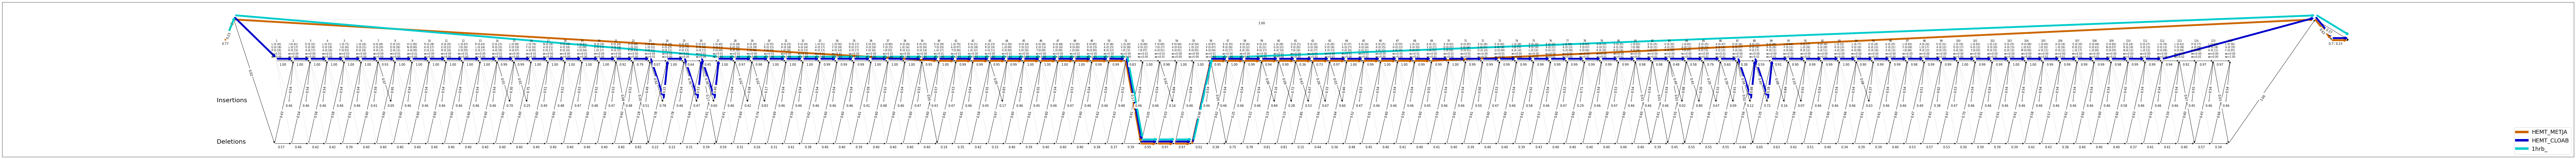

In [3]:
out_filename = "test/data/interactive.alignment.fasta"
config = msa_hmm.config.make_default(num_models)
alignment, r = msa_hmm.align.run_learnMSA(train_filename,
                                              out_filename,
                                              config, 
                                              ref_filename=ref_filename, 
                                              verbose=True,
                                              select_best_for_comparison=False)
for i in range(alignment.num_models):
    msa_hmm.vis.print_and_plot(alignment, i)